# Coding Exercise Part 2: The Effect of Activation Functions

In this coding exercise, you will delve deeper into the significance of activation functions in neural networks. By integrating the activation functions you've implemented into a simple neural network, you will be able to observe and understand the nuances of their behavior.

### Objectives

* **Implement a Simple Neural Network:** Develop a basic feedforward neural network with one hidden layer using PyTorch. The architecture should cater to input size 784, a hidden layer of size 128, and an output layer of size 10.

* **Train Using Varied Activations:** Familiarize yourself with the distinct learning patterns by training the model with each of the following activation functions: Sigmoid, Tanh, ReLU, LeakyReLU, ELU, and Swish.

* **Visualize Gradient Flow:** Explore the internal workings of the neural network by visualizing the gradient flow through the network layers when using different activation functions. Understand the issues of vanishing or exploding gradients and see how each activation function affects this phenomenon.

In [1]:
# Import libraries
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

# Fix random seed: https://pytorch.org/docs/stable/notes/randomness.html
torch.manual_seed(12)

### 1. Implement Neural Network class

Construct a simple neural network using PyTorch that can be flexibly employed with various activation functions. This neural network will be utilized to understand the effects of different activation functions on learning dynamics, gradient flow, and performance.

**Objectives:** 

* Construct a simple neural network using PyTorch that can be flexibly employed with various activation functions.
* This neural network will be utilized to understand the effects of different activation functions on learning dynamics, gradient flow, and performance.

**Background:**

**Feed-forward Neural Network:** A neural network that consists of layers of interconnected nodes (or "neurons"). Each connection has an associated weight, which is adjusted during training to minimize the error in predictions. Between these layers, activation functions introduce non-linearities, allowing the network to learn complex patterns in the data.

**Fashion MNIST dataset:** Fashion MNIST, a dataset consisting of images of clothing items, will be our dataset of choice for this exercise. Each image in Fashion MNIST is 28x28 pixels, resulting in an input size of 784. The dataset contains 10 classes, such as T-shirt, Dress, and Sneaker, leading to an output size of 10 for our network.

In [2]:
class DeepNN(nn.Module):
    """
    A deep feedforward neural network with multiple layers.
    
    Args:
        input_size (int): Size of the input. For Fashion MNIST, this would be 784.
        output_size (int): Size of the output layer. For Fashion MNIST classification, this would be 10.
        activation_func (callable): The activation function to be used in the hidden layers.
        
    Returns:
        torch.Tensor: Tensor output from the forward pass.
    """
    def __init__(self, input_size=784, output_size=10, activation_func=nn.ReLU()):
        super(DeepNN, self).__init__()
        
        # Define the network layers (linear)
        
        self.layer1 = # Your code here 
        self.act1   = activation_func
        
        self.layer2 = # Your code here // 512 -> 256
        self.act2   = activation_func
        
        self.layer3 = # Your code here // 256 -> 128
        self.act3   = activation_func
        
        self.layer4 = # Your code here  // 128 -> 64
        self.act4   = activation_func
        
        self.layer5 = # Your code here // 64 -> 32
        self.act5   = activation_func
        
        self.output_layer = # Your code here 
        
    def forward(self, x):
        """
        Forward pass of the neural network.
        
        Args:
            x (torch.Tensor): The input tensor.
        
        Returns:
            torch.Tensor: The output tensor after passing through the network.
        """
        # Your code here 
    

### 2. Load the Fashion MNIST Dataset

**Objective:**

* Load and familiarize yourself with the Fashion MNIST dataset, a popular dataset used in deep learning.
* Prepare the dataset for training and testing the neural network.

**Background:**

The Fashion MNIST dataset is a collection of 60,000 28x28 grayscale images of 10 fashion categories, along with a test set of 10,000 images. The dataset serves as a direct drop-in replacement for the original MNIST dataset for benchmarking machine learning algorithms. Each image belongs to one of the following categories: T-shirt/top, Trouser, Pullover, Dress, Coat, Sandal, Shirt, Sneaker, Bag, or Ankle boot.

Using PyTorch's utilities, we can easily load, preprocess, and split this dataset into training and testing batches.

**Instructions:**

* Use PyTorch's [torchvision](https://pytorch.org/vision/stable/index.html) library to load the dataset.
* Normalize the dataset to have values between 0 and 1.
* Split the dataset into training and testing batches.

In [3]:
import torch
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

Here, we use the torchvision.datasets.FashionMNIST utility to fetch the Fashion MNIST dataset. The dataset is then transformed and normalized using ```transforms.Compose()```. The normalized dataset is loaded into batches using DataLoader for training and testing purposes.

In [4]:
# Define the transformation pipeline for the dataset
transform = transforms.Compose([
    transforms.ToTensor(),  # Convert image to tensor
    transforms.Normalize((0.5,), (0.5,))  # Normalize with mean=0.5, std=0.5
])

# Load the training and testing datasets
train_dataset = datasets.FashionMNIST(root='./data', train=True, download=True, transform=transform)
test_dataset  = datasets.FashionMNIST(root='./data', train=False, transform=transform)

In [5]:
# Define the dataloaders for training and testing
batch_size = 16
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader  = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

print("Fashion MNIST dataset loaded successfully!")

Fashion MNIST dataset loaded successfully!


### 3. Visualizing Fashion MNIST Samples

**Objective:**

* Get acquainted with the type of data we're dealing with by visualizing a batch of images from the Fashion MNIST dataset.

**Instructions:**

* Utilize matplotlib to plot a grid of images from a batch.
* Ensure that the images are denormalized (if they were previously normalized) to correctly display them.

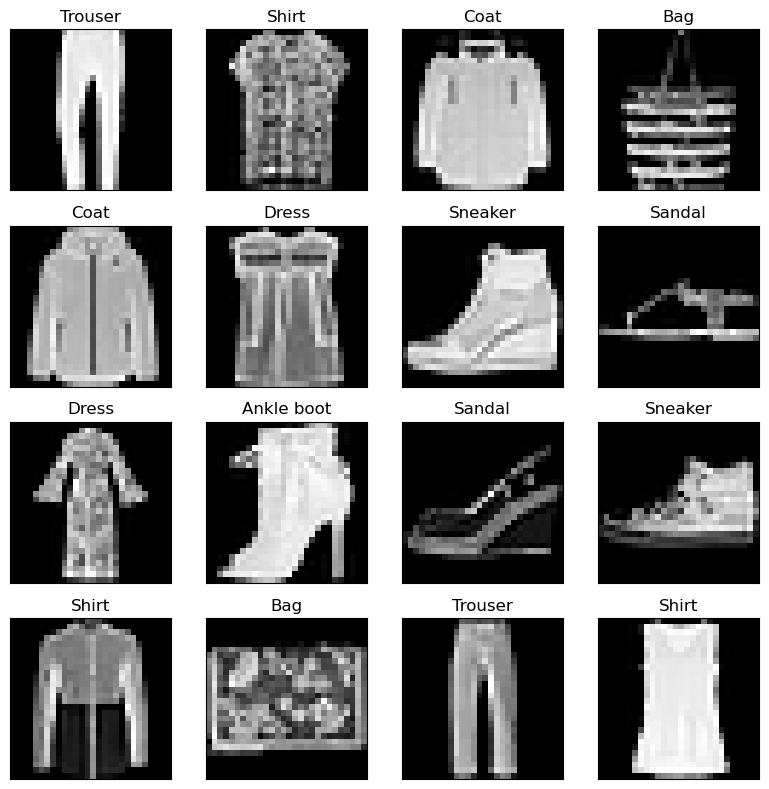

In [6]:
import matplotlib.pyplot as plt

def imshow(img):
    """Helper function to un-normalize and display an image."""
    img = img / 2 + 0.5  # Un-normalize (if normalized with mean=0.5 and std=0.5)
    plt.imshow(img.numpy().squeeze(), cmap='gray')

# Get a single batch of images and their corresponding labels
images, labels = next(iter(train_loader))

# Define the Fashion MNIST classes
classes = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
           'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# Plot the images in a grid
fig = plt.figure(figsize=(8, 8))

for i in range(16):  # Let's display 20 images
    ax = fig.add_subplot(4, 4, i + 1, xticks=[], yticks=[])
    imshow(images[i])
    ax.set_title(classes[labels[i].item()])

plt.tight_layout()
plt.show()

### 4. Observe Gradient Flow with Different Activation Functions

**Objective:**

* Set the deep neural network using various activation functions: ReLU, Sigmoid, Tanh, LeakyReLU, ELU, and Swish.
* Investigate the gradient flow in different layers of the neural network for each activation function.

**Background:**

**Gradients** can sometimes either vanish (become very small) or explode (become very large) as it is back-propagated from the output layer towards the input layer. This can result in the network failing to train effectively. The type of activation function used can have a significant impact on this behavior.

**Seaborn** is a Python data visualization library based on matplotlib. It provides a high-level interface for creating attractive graphs. Seaborn has several advantages over the basic matplotlib library:

* It comes with several built-in themes and color palettes to make visually appealing plots.
* It's easier to visualize data with complex relationships.
* Built-in functions for regression and clustering.

In this exercise, we'll leverage [Seaborn's](https://seaborn.pydata.org/examples/index.html) capabilities to visualize the gradient distributions. If you're new to Seaborn, you may want to explore their official tutorials for a deeper understanding.

**Instructions:**

* For each activation function, observe the gradient magnitudes in different layers of the network.
* Utilize histograms or similar plots to visualize the distribution of gradients for each layer.

In [7]:
# Fetching the device that will be used throughout this notebook

# Check if CUDA (GPU support) is available, otherwise use CPU.
# This allows the code to be run on machines without a GPU.
device = torch.device("cpu") if not torch.cuda.is_available() else torch.device("cuda:0")

# Print out the device being used (for clarity and debugging purposes).
print("Using device", device)

Using device cuda:0


In [8]:
# Import Seaborn
import seaborn as sns

def plot_gradients_seaborn(named_parameters, act_fn_name, color="C0"):
    """
    Visualizes the gradients across different layers using Seaborn.
    
    Args:
        named_parameters (iterator): An iterator yielding both the name of the parameter 
                                     as well as the parameter itself.
        act_fn_name (str): The name of the activation function used in the model.
        color (str): Color in which we want to visualize the histogram.
        
    Returns:
        None. Displays histograms for gradient magnitudes of each layer.
    """
    grads = {name: params.grad.data.view(-1).cpu().clone().numpy() 
             for name, params in named_parameters if "weight" in name}
    
    columns = len(grads)
    fig, ax = plt.subplots(1, columns, figsize=(columns*3.5, 2.5))
    fig_index = 0
    for key in grads:
        key_ax = ax[fig_index%columns]
        sns.histplot(data=grads[key], bins=30, ax=key_ax, color=color, kde=True)
        key_ax.set_title(str(key))
        key_ax.set_xlabel("Grad magnitude")
        fig_index += 1
    fig.suptitle(f"Gradient magnitude distribution for activation function {act_fn_name}", fontsize=14, y=1.05)
    fig.subplots_adjust(wspace=0.45)
    plt.show()
    plt.close()

In [9]:
def train_and_inspect_gradients(model, train_loader, criterion, optimizer, act_fn_name, color="C0"):
    """
    Train the model and inspect gradient flow.
    
    Args:
        model (DeepNN): The DeepNN model to train.
        train_loader (torch.utils.data.DataLoader): The data loader.
        criterion (callable): The loss function.
        optimizer (torch.optim.Optimizer): The optimizer.
        act_fn_name (str): The name of the activation function used in the model.
        color (str): Color for gradient visualization.
        
    Returns:
        None. Trains the model and displays gradient histograms.
    """
    
    # Use only one epoch for demonstration
    model.train()
    for batch_idx, (data, target) in enumerate(train_loader):
        data, target = data.to(device), target.to(device)
        
        optimizer.zero_grad()
        output = model(data.view(-1, 784))
        loss = criterion(output, target)
        loss.backward()
        
        optimizer.step()
        
        # For demonstration, inspect gradient after first batch
        if batch_idx == 0:
            plot_gradients_seaborn(model.named_parameters(), act_fn_name, color=color)
            break

In [ ]:
# We'll test the gradient flow for multiple activation functions to compare their behavior.
# The activation functions we'll be experimenting with are:
# ReLU, LeakyReLU, ELU, and Sigmoid.

# List of activation functions to be used in our neural network
act_fn_list = [nn.ReLU(), nn.LeakyReLU(), nn.ELU(), nn.Sigmoid()]

# Corresponding names of the activation functions for display purposes
act_fn_names = ["ReLU", "LeakyReLU", "ELU", "Sigmoid"]

# Iterating over each activation function to:
# 1. Initialize our deep neural network with the given activation function.
# 2. Define the optimizer for training.
# 3. Train the network.

for i, act_fn in enumerate(act_fn_list):
    # Initialize the neural network with the current activation function and move it to the specified device
    
    # Your code here 
    
    # Define the optimizer for training. Here, we're using the Adam optimizer.
    
    # Your code here 
    
    # Train the network and visualize the gradient magnitudes using our custom function.
    # We also specify a unique color for each activation function's visualization for clarity.
    train_and_inspect_gradients(net, train_loader, torch.nn.functional.cross_entropy, optimizer, act_fn_names[i], color=f"C{i}")

**Observations:**

From our visual inspections of the gradient magnitudes for various activation functions, we can draw a few observations:

**ReLU:** This activation function is known for its ease of computation and efficient gradient propagation. However, the plots suggest potential issues like the dying ReLU problem, where neurons can sometimes get stuck during training and always output zero. This can result in sparse gradients.

**LeakyReLU:** An improvement over ReLU, LeakyReLU aims to fix the dying ReLU problem by allowing a small, non-zero gradient when the unit is not active. The distribution of gradient magnitudes indicates a more balanced gradient flow compared to ReLU, especially for negative input values.

**ELU:** From the plots, ELU seems to produce a smoother gradient distribution which could lead to better convergence properties during training.

**Sigmoid:** Historically a popular choice, Sigmoid has fallen out of favor due to the vanishing gradient problem, which can slow down learning or cause it to stop entirely. The histograms indicate that while the gradients for the output layer are very large with up to 0.1, the input layer has the lowest gradient norm across all activation functions (1e-6).

By visually comparing gradient distributions, we gain a more intuitive understanding of how different activation functions impact the learning process of deep neural networks. This serves as a basis for selecting suitable activation functions for specific tasks or network architectures.

### 5. Train with Different Activation Functions

Let's repeat the experiment, but now training for a few epochs.

In [ ]:
def train_several_epochs(model, train_loader, criterion, optimizer, act_fn_name, color="C0", epochs=1):
    """
    Train the model and inspect gradient flow.
    
    Args:
        model (DeepNN): The DeepNN model to train.
        train_loader (torch.utils.data.DataLoader): The data loader.
        criterion (callable): The loss function.
        optimizer (torch.optim.Optimizer): The optimizer.
        act_fn_name (str): The name of the activation function used in the model.
        color (str): Color for gradient visualization.
        epochs (int): Number of training epochs.
        
    Returns:
        None. Trains the model and displays gradient histograms.
    """
    
    model.train()
    for epoch in range(epochs):
        epoch_loss = 0
        correct_preds = 0
        
        for batch_idx, (data, target) in enumerate(train_loader):
            data, target = data.to(device), target.to(device)
            
            optimizer.zero_grad()
            output = model(data.view(-1, 784))
            loss = criterion(output, target)
            loss.backward()
            
            optimizer.step()
            
            # Update epoch loss
            epoch_loss += loss.item()
            
            # Update correct predictions
            _, predicted = output.max(1)
            correct_preds += (predicted == target).sum().item()
        
        # Calculate average loss and accuracy over the epoch
        avg_loss = epoch_loss / len(train_loader)
        accuracy = 100. * correct_preds / len(train_loader.dataset)
        
        print(f"Epoch {epoch+1}/{epochs}, Loss: {avg_loss:.4f}, Accuracy: {accuracy:.2f}%")


# List of activation functions to be used in our neural network
act_fn_list = [nn.ReLU(), nn.LeakyReLU(), nn.ELU(), nn.Sigmoid()]

# Corresponding names of the activation functions for display purposes
act_fn_names = ["ReLU", "LeakyReLU", "ELU", "Sigmoid"]

# Train and visualize for each activation function.
for i, act_fn in enumerate(act_fn_list):
    print("Training with " + str(act_fn))
    net = DeepNN(activation_func=act_fn).to(device)
    optimizer = optim.Adam(net.parameters(), lr=0.001)
    train_several_epochs(net, train_loader, torch.nn.functional.cross_entropy, optimizer, act_fn_names[i], color=f"C{i}", epochs=1)
    print("--")

### 6. Diving Deeper: Exploring Further with Activation Functions

The topic of activation functions in neural networks is intricate and offers various avenues for further exploration. Here are some aspects to consider:

* **Dead Neurons in ReLU Networks:** One limitation of the ReLU activation function is the occurrence of "dead neurons". Specifically, some neurons might never activate. It could be insightful to inspect networks that employ ReLU and identify such neurons. For a neuron to be considered "dead" in a ReLU network, the output value of that neuron in the linear layer preceding the ReLU must be negative for all input images.

* **Performance Analysis:** Different activation functions might have different computational costs. Analyze the efficiency of various functions. For instance, determine if the forward/backpropagation process is slower for certain activation functions compared to others.

While the exercises provided in this notebook offer a practical perspective on gradient flow with various activation functions, there are many more aspects and nuances to explore in the realm of neural networks. Continue exploring and experimenting to deepen your understanding.